Hi everyone, welcome to the week 1 of Linear regression project on AIML Community. Linear regression is the most basic and often used Machine Learning algorithm in Data Science. Despite being the easiest one, it is ignored often times and not included in training the model, which is a regressive outlook. In this project, A to Z of Machine learning will be covered and a small project for prediction of housing price in King County, USA will be done using Linear Regression. 

Let's get started. 

Let us start with the definition first of all, Linear regression is a linear approach to modeling the relationship between a scalar response and one or more explanatory variables. The relationship can be simple with one variable or with many variables, the realtionship between the target variable and explanatory variable will be linear i.e. one degree.

The simplest representation of a linear regression equation is:

y=mx+c

Here, y is the output and x is the input. m is the slope, which is the differential of the equation at any point. Since this is a linear equation, it will stay same throughtout. Intercept is actually the distance of y from the x axis when x=0.

Let us imagine an equation y=2x+1, 2 is the slope and 1 is the intercept. The straight line would somewhat look like this(I will do this after importing all the dependencies :)

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

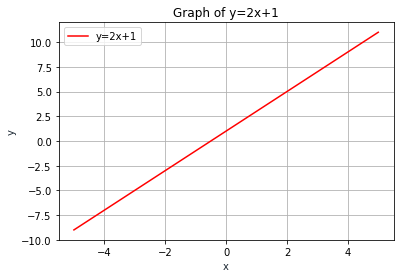

In [13]:
x = np.linspace(-5,5,10)
y = 2*x+1
plt.plot(x, y, '-r', label='y=2x+1')
plt.title('Graph of y=2x+1')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In the graph above, you see a straight line. This is a simple linear regression problem. Being linear means straight line or having a degree of one in the algebraic equation. We can also make a linear equation with more than one input variable. It is called multiple linear regression. It is of the form:

y=m1x1 + m2x2 + m3x3 + m4x4 +........

Now we will start with the problem at hand, which is about predicting house price in King county, USA. We have a number of Input variables and our output should be the price. So, essentially, we have to use machine learning algorithm to predict the price of houses in King County, USA using the various features like bedrooms, bathrooms, sqft living area space, etc. We will start off by importing the dataset and looking at the first five rows of the data.

You will find the dataset in the Github folder.

In [14]:
df=pd.read_csv(r"C:\Users\srtpa\Desktop\kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [15]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# Exploring the dataset

I am going to perform very basic EDA here. You can add more interactive and informative graphs to display your data better. In the columns above, we will decide which columns to keep and which to drop or modify. Let us first try to look at the columns yr_built and yr_renovated and try to modify them.

Since the main goal of this notebook is to construct a working model which has the capability of predicting the price of houses, we will need to separate the dataset into features and the target variable. The target variable, 'price', will be the variable we seek to predict and other variables are features These are stored in features and prices, respectively.

The first step would be look at the property of our target variable

In [16]:
print("The maximum price of a house is {}".format(df['price'].max()))
print("The minimum price of a house is {}".format(df['price'].min()))
print("The mean price of houses is {}".format(df['price'].mean()))
print("The median price of houses is {}".format(df['price'].median()))

The maximum price of a house is 7700000.0
The minimum price of a house is 75000.0
The mean price of houses is 540088.1417665294
The median price of houses is 450000.0


Let us modify the columns yr_built and yr_renovated a bit:

In [17]:
print(df['yr_built'].max())
print(df['yr_built'].min())

2015
1900


The newest house was built in 2015 so we can calculate the age of houses from 2015 by subtracting the houses built from 2015. Let us explore the next feature, year renovted.

In [18]:
df['age']=2015-df['yr_built']

In [5]:
print(df['yr_renovated'].max())
print(df['yr_renovated'].min())

2015
0


In [6]:
df['renovation']=2015-df['yr_renovated']

In the dataset above, we do not need the columns id and price, so we will drop these in the dataframe. We have modified the yr_built and yr_renovated so we will drop both as well. In the subsequent lines, we will have a look at the statistical parameters of our data and then look out for missing values, if there are any.

In [19]:
df.drop(columns=["id",'date','yr_built','yr_renovated'], inplace=True)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,60
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,64
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,50
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,98103,47.6993,-122.346,1530,1509,6
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,98146,47.5107,-122.362,1830,7200,1
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,98144,47.5944,-122.299,1020,2007,6
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,98027,47.5345,-122.069,1410,1287,11


In [20]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,age
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,43.994864
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,53.505026,0.138564,0.140828,685.391304,27304.179631,29.373411
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,18.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,40.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,64.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,115.000000


In [21]:
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
age              0
dtype: int64

We can see there are no missing values in the data and now we will find correlation of various variables with one another. We will use pearson correlation coefficient. Correlation is a quantitative assessment that measures both the direction and the strength of this tendency to vary together.A number closer to 1 indicates strong correlation while a number of closer to 0 indicates weak correlation. A positive coefficient means proportional realtion, i.e.the variable 2 moves in the same direction as variable 1, with which we are comparing.

Apart from seeing it numerically, we can also see it visually with the help of matplotlib and seaborn libraries in Python.

In [22]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,age
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,-0.053203,0.307003,0.021626,0.585379,0.082447,-0.054012
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,-0.152668,-0.008931,0.129473,0.391638,0.029244,-0.154178
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,-0.203866,0.024573,0.223042,0.568634,0.087175,-0.506019
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,-0.199430,0.052529,0.240223,0.756420,0.183286,-0.318049
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,-0.129574,-0.085683,0.229521,0.144608,0.718557,-0.053080
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,-0.059121,0.049614,0.125419,0.279885,-0.011269,-0.489319
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,0.030285,-0.014274,-0.041910,0.086463,0.030703,0.026161
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,0.084827,0.006157,-0.078400,0.280439,0.072575,0.053440
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,0.003026,-0.014941,-0.106500,-0.092824,-0.003406,0.361417
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,-0.184862,0.114084,0.198372,0.713202,0.119248,-0.446963


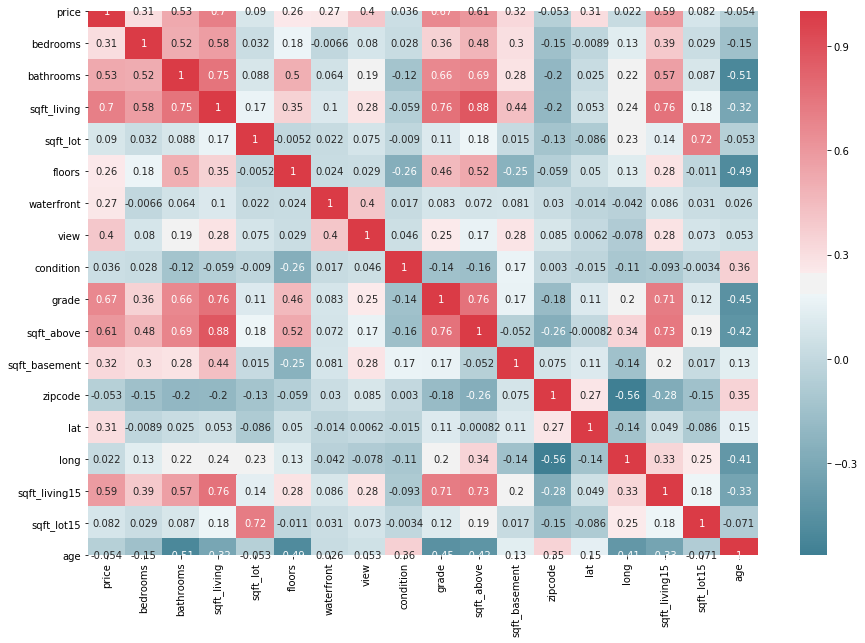

In [23]:
def correlation_heatmap(df1):
    _, ax = plt.subplots(figsize = (15, 10))
    colormap= sns.diverging_palette(220, 10, as_cmap = True)
    sns.heatmap(df.corr(), annot=True, cmap = colormap)

correlation_heatmap(df) 

This is all for week 1, we will explore more in week 2 assignment and do more data analysis and visualization. You need to be thorough with all the things being done here and practice them. If there is any query, feel free to ask me on the community. 